In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


In [8]:
df=pd.read_csv(r'C:/Users/AL MADINA COMPUTER/Desktop/Machine Learning/earning.csv')
df.head()

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


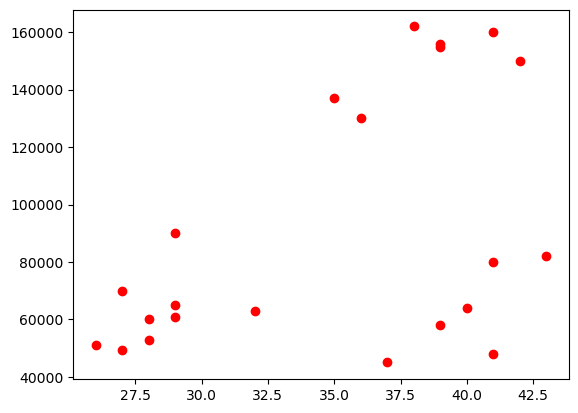

In [9]:
plt.scatter(df['age'], df['income'], color='red')

In [11]:
k=KMeans(n_clusters=3)
k

KMeans(n_clusters=3)

In [13]:
y_pred=k.fit_predict(df[['age', 'income']])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0])

In [14]:
df['cluster']=y_pred
df.head()

,age,income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0


In [23]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


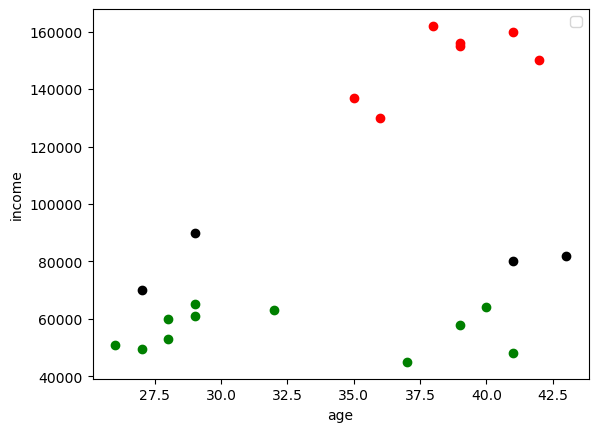

In [24]:
plt.scatter(df1.age, df1.income, color='red')
plt.scatter(df2.age, df2.income, color='green')
plt.scatter(df3.age, df3.income, color='black')

plt.xlabel('age')
plt.ylabel('income')
plt.legend()

In [31]:
scaler=MinMaxScaler()



In [39]:
scaler.fit(df[['income']])
df['income']=scaler.transform(df[['income']])
df

,age,income,cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.726496,0
9,0.529412,0.786325,0


In [40]:
scaler.fit(df[['age']])
df['age']=scaler.transform(df[['age']])
df

,age,income,cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.726496,0
9,0.529412,0.786325,0


In [44]:
k=KMeans(n_clusters=3)
y_pred=k.fit_predict(df[['age', 'income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0])

In [45]:
df['cluster']=y_pred
df.drop('cluster', axis='columns', inplace=True)

In [47]:
k.cluster_centers_

array([[0.7394958 , 0.8974359 ],
       [0.1372549 , 0.14957265],
       [0.83333333, 0.15242165]])

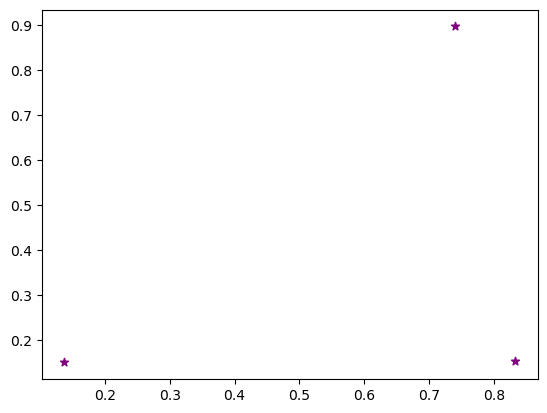

In [51]:
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

C:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


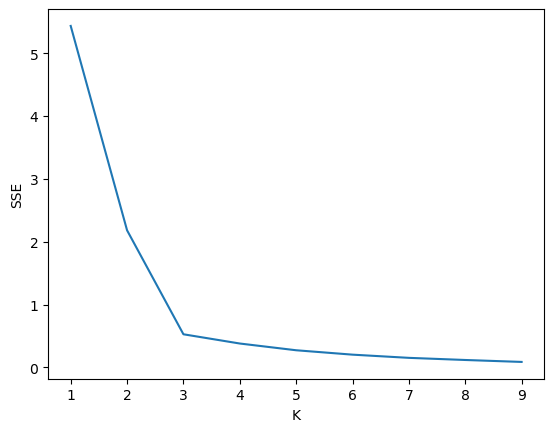

In [55]:
#Elbow Plot
k_rng=range(1,10)
sse=[]
for k in k_rng:
    k=KMeans(n_clusters=k)
    k.fit(df[['age', 'income']])
    sse.append(k.inertia_)
    
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng, sse)